In [99]:
import matplotlib
matplotlib.use('agg')
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

In [149]:
openpv=pd.read_csv('./Datasets/openpv.csv',index_col=False)
openpv=openpv.rename(columns={'Size (kW DC)':'Size_kw'})
openpv['Zipcode']=openpv['Zipcode'].apply(str)
openpv.loc[519,'State']='IN'
openpv['Date_inst']=[ datetime.strptime(i, '%m/%d/%Y') for i in openpv['Date Installed']]
openpv.drop('Date Installed',axis=1, inplace=True)
openpv.drop('Filters=', axis=1, inplace=True)

In [150]:
openpv.head()

,Zipcode,State,Size_kw,Cost,Date_inst
0,85048.0,AZ,9.000,46061.19352,2014-03-10
1,85268.0,AZ,3.000,15562.94976,2013-08-26
2,85234.0,AZ,9.180,40172.24862,2014-09-12
3,85024.0,AZ,7.425,51128.75533,2011-03-02
4,85201.0,AZ,7.920,40506.65221,2013-01-11


In [152]:
print 'numer or lines', len(openpv)
print 'unique zipcodes', len(openpv['Zipcode'].unique())
print 'num states', len(openpv['State'].unique())
print 'total size', sum(openpv['Size_kw'])
print 'total cost', sum(openpv['Cost'])

numer or lines 138030
unique zipcodes 9284
num states 52
total size 15604315.0923
total cost nan


In [142]:
TimeSeries=openpv.groupby(['Date_inst'])['Size_kw'].sum()
TimeSeries.drop(TimeSeries.argmax(),axis=0,inplace=True) #Clear outlier that dwarfs the rest of the graph
TimeSeries=TimeSeries[TimeSeries.index.year>2007] #the bulk of the available data
TimeSeriesM=TimeSeries.groupby(pd.TimeGrouper("M")).sum()
TimeSeriesA=TimeSeries.groupby(pd.TimeGrouper("A")).sum()

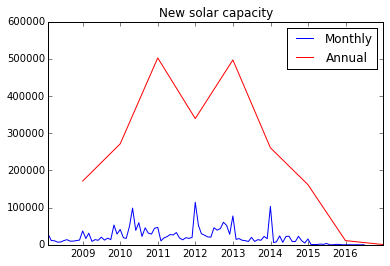

In [147]:
plt.title('New solar capacity')
plt.plot(TimeSeriesM.index, TimeSeriesM.values, label='Monthly')
plt.plot(TimeSeriesA.index, TimeSeriesA.values,'r-', label='Annual')
plt.legend()

In [181]:
states= openpv.groupby(['State'])
states_stats=states.size()
states_stats.sort(ascending=False) #sorts inplace automatically
states_stats[:20]
# _values()#(ascending=False)#inplace=True)

State
CA    74694
AZ    20382
CT     7900
NY     4457
MD     3878
MA     3376
CO     2295
HI     2202
DE     2071
PA     2061
NJ     1946
DC     1849
OR     1815
TX     1641
FL      958
WI      829
IN      730
TN      597
MN      480
UT      360
dtype: int64

Date_inst
2008-01-31    17566.9990
2008-02-29     7838.0272
2008-03-31     8243.7540
2008-04-30     5247.4600
2008-05-31     5138.8300
Freq: M, Name: Size_kw, dtype: float64


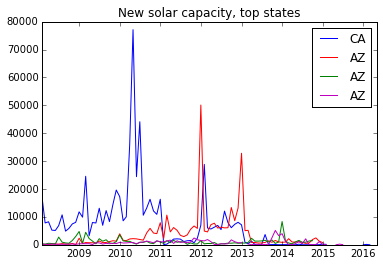

In [235]:
CA=states.get_group('CA')
CA_timeseries=CA.groupby(['Date_inst'])['Size_kw'].sum()
CA_timeseries=CA_timeseries[CA_timeseries.index.year>2007] #the bulk of the available data
CA_timeseries=CA_timeseries.groupby(pd.TimeGrouper("M")).sum()

AZ=states.get_group('AZ')
AZ_timeseries=AZ.groupby(['Date_inst'])['Size_kw'].sum()
AZ_timeseries=AZ_timeseries[AZ_timeseries.index.year>2007] #the bulk of the available data
AZ_timeseries=AZ_timeseries.groupby(pd.TimeGrouper("M")).sum()

CT=states.get_group('CT')
CT_timeseries=CT.groupby(['Date_inst'])['Size_kw'].sum()
CT_timeseries=CT_timeseries[CT_timeseries.index.year>2007] #the bulk of the available data
CT_timeseries=CT_timeseries.groupby(pd.TimeGrouper("M")).sum()

NY=states.get_group('NY')
NY_timeseries=NY.groupby(['Date_inst'])['Size_kw'].sum()
NY_timeseries=NY_timeseries[NY_timeseries.index.year>2007] #the bulk of the available data
NY_timeseries=NY_timeseries.groupby(pd.TimeGrouper("M")).sum()


plt.title('New solar capacity, top states')
plt.plot(CA_timeseries.index, CA_timeseries.values, label='CA')
plt.plot(AZ_timeseries.index, AZ_timeseries.values, 'r-', label='AZ')
plt.plot(CT_timeseries.index, CT_timeseries.values, 'g-', label='AZ')
plt.plot(NY_timeseries.index, NY_timeseries.values, 'm-', label='AZ')

plt.legend()

In [255]:
#Creating dataset for the CartDB visualization - cumulative solar over time
open2000=openpv[openpv['Date_inst']>='2000']
zips=open2000.groupby(['Zipcode', pd.TimeGrouper(key='Date_inst', freq='M')])['Size_kw'].sum()
zips =zips.cumsum()
zips.to_csv('./Datasets/Installed_Solar_byZip002.csv', sep=',')
print zips[:5]

Zipcode  Date_inst 
10001.0  2011-07-31    27.600000
         2012-01-31    30.360000
10002.0  2003-07-31    32.780000
         2003-11-30    34.809632
         2005-06-30    43.003118
Name: Size_kw, dtype: float64


In [253]:
zips=zips.to_frame()
zips=zips.reset_index()
zips=zips.pivot(index='Zipcode', columns='Date_inst', values='Size_kw')

In [254]:
zips.to_csv('./Datasets/Installed_Solar_byZip.csv', sep=',')